In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [228]:
details = pd.read_csv("patient_icu_ward_stay_list_deid.csv", sep=',')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,07/10/1999,NaN,Male,1,28/04/2016 11:15,29/04/2016 12:15,NaN,NaN,1,1.0,28/04/2016 19:00,5.0,NaN,PICU
1,ZI0001,07/10/1999,NaN,Male,2,07/05/2016 13:43,08/05/2016 15:25,NaN,NaN,1,1.0,07/05/2016 17:00,3.0,NaN,PICU
2,XY0002,09/06/1998,NaN,Male,1,07/01/2016 16:20,09/01/2016 16:22,NaN,NaN,1,1.0,07/01/2016 18:00,5.0,NaN,PICU
3,DX0003,04/11/1998,NaN,Female,1,24/06/2016 18:05,25/06/2016 16:22,NaN,NaN,1,1.0,25/06/2016 01:00,5.0,NaN,FLAMI
4,FK0004,09/03/1999,NaN,Female,1,03/03/2017 15:04,20/03/2017 14:17,1.0,04/03/2017 14:45,1,1.0,11/03/2017 15:00,1.0,04/03/2017 15:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,11/01/2018,NaN,Male,1,29/12/2018 21:35,31/12/2018 12:54,NaN,NaN,1,1.0,31/12/2018 00:00,5.0,NaN,PICU
5653,HK4117,28/12/2018,NaN,Male,1,28/12/2018 08:20,01/01/2019 13:15,NaN,NaN,1,1.0,28/12/2018 18:00,5.0,NaN,NICU
5654,TI4118,11/09/2016,NaN,Male,1,26/12/2018 21:20,08/01/2019 12:51,NaN,NaN,1,1.0,03/01/2019 12:00,5.0,NaN,PICU
5655,KI4119,13/05/2016,NaN,Female,1,30/12/2018 22:42,31/12/2018 16:39,NaN,NaN,0,0.0,NaN,NaN,NaN,PICU


In [229]:
details['extubation_deid_date'] = pd.to_datetime(details['extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['failed_extubation_deid_date'] = pd.to_datetime(details['failed_extubation_deid_date'], format='%d/%m/%Y %H:%M')
details['re_intubation_deid_date'] = pd.to_datetime(details['re_intubation_deid_date'], format='%d/%m/%Y %H:%M')
details['death_deid_date'] = pd.to_datetime(details['death_deid_date'], format='%d/%m/%Y')
details['icu_start_deid_dttm'] = pd.to_datetime(details['icu_start_deid_dttm'], format='%d/%m/%Y %H:%M')
details['icu_end_deid_dttm'] = pd.to_datetime(details['icu_end_deid_dttm'], format='%d/%m/%Y %H:%M')
details['birth_deid_date'] = pd.to_datetime(details['birth_deid_date'], format='%d/%m/%Y')
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
4,FK0004,1999-03-09,NaT,Female,1,2017-03-03 15:04:00,2017-03-20 14:17:00,1.0,2017-03-04 14:45:00,1,1.0,2017-03-11 15:00:00,1.0,2017-03-04 15:00:00,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU
5655,KI4119,2016-05-13,NaT,Female,1,2018-12-30 22:42:00,2018-12-31 16:39:00,NaN,NaT,0,0.0,NaT,NaN,NaT,PICU


## REMOVING PATIENTS WITH LOW CONFIDENCE SCORE (992 patients removed)

In [230]:
details_all_scores = details
details = details_all_scores[details_all_scores["extubation_score"]>2.5]
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


In [242]:
cohort_1_details = details[pd.isnull(details["failed_extubation_deid_date"]) == False]
cohort_2_details_temp = details[(details["failed_extubation_flag"] != 1.0)]
cohort_2_details = cohort_2_details_temp[pd.isnull(cohort_2_details_temp["death_deid_date"]) == True]
cohort_3_details = details[pd.isnull(details["death_deid_date"]) == False]
# cohort_3_details = cohort_3_details_temp[pd.isnull(cohort_3_details_temp["failed_extubation_deid_date"]) == True]
cohort_3_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
49,OL0043,2000-07-12,2018-04-25,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaT,1,1.0,2016-06-09 02:00:00,5.0,NaT,PICU
91,JT0073,2003-04-26,2018-08-18,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaT,1,1.0,2018-07-29 15:15:00,5.0,NaT,FLAMI
124,CD0102,2003-02-18,2018-09-17,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaT,1,1.0,2017-08-09 19:00:00,5.0,NaT,PICU
160,XX0133,2002-01-25,2018-01-24,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaT,1,1.0,2016-02-21 11:00:00,5.0,NaT,PICU
181,DN0147,2000-08-11,2017-08-19,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaT,1,1.0,2016-10-14 14:00:00,5.0,NaT,PICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,IE3963,2013-04-09,2018-11-20,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaT,1,1.0,2018-10-31 13:00:00,5.0,NaT,FLAMI
5517,JV3994,2018-10-16,2018-10-30,Female,1,2018-10-23 02:00:00,2018-10-30 13:45:00,1.0,2018-10-28 10:00:00,1,1.0,2018-10-28 10:00:00,5.0,2018-10-29 20:00:00,NICU
5535,BB4010,2003-09-15,2018-11-20,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaT,1,1.0,2018-11-20 23:00:00,5.0,NaT,FLAMI
5551,WE4023,2018-11-10,2019-01-03,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaT,1,1.0,2019-01-03 09:30:00,5.0,NaT,NICU


In [238]:
i = 0
for p in cohort_1_details["death_deid_date"]:
    if pd.isnull(p)==False:
        i+=1
        print(p)
print(i)


2017-09-18 00:00:00
2017-10-31 00:00:00
2017-05-15 00:00:00
2017-06-03 00:00:00
2018-01-15 00:00:00
2018-04-11 00:00:00
2018-05-12 00:00:00
2016-07-18 00:00:00
2016-10-28 00:00:00
2016-10-22 00:00:00
2018-04-09 00:00:00
2017-03-22 00:00:00
2017-07-02 00:00:00
2017-08-05 00:00:00
2017-07-04 00:00:00
2018-10-14 00:00:00
2017-05-20 00:00:00
2017-04-06 00:00:00
2017-07-01 00:00:00
2018-05-06 00:00:00
2017-10-12 00:00:00
2018-11-08 00:00:00
2018-06-25 00:00:00
2018-07-04 00:00:00
2018-07-11 00:00:00
2018-10-31 00:00:00
2018-10-30 00:00:00
27


### Note: 27 (this number may have changed) patients in cohort 1 who died AFTER a failed extubation, do we assume that the failed extubation time is a mistake or keep them in?


In [245]:
cohort_1_details = cohort_1_details[pd.isnull(cohort_1_details["death_deid_date"])==True]
details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


### THey have been removed from cohort 1, they are is cohort 3 only - this is ok just make sure to analyse them a bit differently because if they died due to improper reintubation then their dynamics will be different

In [246]:
cohort_1_details["extubation_duration"] = [((x - y).seconds)/60 for x, y in zip(cohort_1_details['re_intubation_deid_date'], cohort_1_details['failed_extubation_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0


## 50 patients with duration < 120

In [247]:
cohort_1_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_1_details['extubation_deid_date'], cohort_1_details['birth_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
75,NI0065,2002-02-19,NaT,Male,1,2017-08-15 11:15:00,2017-09-11 10:35:00,1.0,2017-08-20 11:00:00,1,1.0,2017-08-25 14:00:00,3.0,2018-08-20 11:30:00,PICU,30.0,5666.583333
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0,5016.458333
95,ZE0077,2001-11-29,NaT,Male,1,2017-07-10 03:30:00,2017-07-31 12:08:00,1.0,2017-07-12 18:30:00,1,1.0,2017-07-18 13:00:00,5.0,2017-07-12 19:00:00,PICU,30.0,5710.541667
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0,5502.541667
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0,5771.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0,83.750000
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0,23.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0,5.458333
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0,76.493750


Text(0, 0.5, 'Proportion')

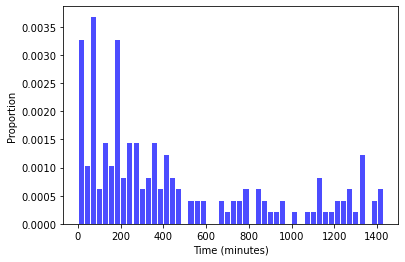

In [248]:

plt.hist(cohort_1_details['extubation_duration'], facecolor='blue', bins=50, density=True, alpha=0.7, rwidth=0.83)
plt.xlabel("Time (minutes)")
plt.ylabel("Proportion")

In [249]:
cohort_1_extubation_duration = pd.DataFrame(cohort_1_details['extubation_duration'])
cohort_1_extubation_duration = cohort_1_extubation_duration.sort_values(by='extubation_duration')
cohort_1_extubation_duration

,extubation_duration
3060,0.0
2965,0.0
946,0.0
5068,0.0
5082,0.0
...,...
3147,1380.0
2459,1380.0
4330,1410.0
896,1428.0


In [250]:
extubation_time_quantiles = cohort_1_extubation_duration.quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
extubation_time_quantiles


,extubation_duration
0.0,0.0
0.1,30.0
0.2,70.0
0.3,150.0
0.4,180.0
0.5,285.0
0.6,390.0
0.7,540.0
0.8,840.0
0.9,1220.0


## Old

Window of 30 means we throw away 20% of data

Window of 60 means we throw away 30% of data

Window of 90 means we throw away 40% of data

In [251]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU


In [253]:
cohort_1_details = cohort_1_details[cohort_1_details["extubation_duration"] > 120]
cohort_1_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,extubation_duration,age (days)
85,KH0067,2003-01-22,NaT,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,1,1.0,2016-10-16 11:00:00,4.0,2016-10-16 16:30:00,PICU,360.0,5016.458333
165,JJ0136,2001-06-12,NaT,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,1,1.0,2016-07-05 13:00:00,4.0,2016-07-05 17:00:00,FLAMI,285.0,5502.541667
198,PQ0160,2002-05-08,NaT,Female,1,2018-02-11 00:01:00,2018-03-04 15:13:00,1.0,2018-02-24 17:50:00,1,1.0,2018-02-24 18:00:00,5.0,2018-02-25 01:00:00,PICU,430.0,5771.750000
204,SZ0162,2006-01-09,NaT,Male,1,2016-04-12 15:30:00,2016-05-12 13:00:00,1.0,2016-04-28 16:00:00,1,1.0,2016-04-28 16:00:00,5.0,2016-04-28 23:00:00,PICU,420.0,3762.666667
239,PC0192,2004-06-22,NaT,Male,1,2016-12-22 11:53:00,2017-02-18 17:13:00,1.0,2017-01-10 18:00:00,1,1.0,2016-12-28 18:00:00,5.0,2017-01-11 14:00:00,FLAMI,1200.0,4572.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5424,VV3912,2018-08-23,NaT,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,1,1.0,2018-11-14 18:00:00,3.0,2018-11-14 21:00:00,PICU,180.0,83.750000
5484,PL3964,2018-09-29,NaT,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,1,1.0,2018-10-22 15:00:00,5.0,2018-10-23 06:00:00,NICU,900.0,23.625000
5496,RD3976,2018-10-14,NaT,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,1,1.0,2018-10-19 11:00:00,5.0,2018-10-19 21:00:00,NICU,600.0,5.458333
5565,TV4037,2018-09-28,NaT,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,1,1.0,2018-12-13 11:51:00,5.0,2018-11-14 10:00:00,PICU,1330.0,76.493750


### Age

(array([2.90686600e-03, 9.90977044e-04, 6.60651363e-04, 2.64260545e-04,
        1.98195409e-04, 3.96390818e-04, 1.32130273e-04, 6.60651363e-05,
        1.98195409e-04, 6.60651363e-05, 6.60651363e-05, 2.64260545e-04,
        1.98195409e-04, 6.60651363e-05, 1.32130273e-04, 0.00000000e+00,
        6.60651363e-05, 1.32130273e-04, 6.60651363e-05, 0.00000000e+00,
        1.32130273e-04, 6.60651363e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.60651363e-05, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 6.60651363e-05, 0.00000000e+00, 6.60651363e-05,
        0.00000000e+00, 1.32130273e-04, 6.60651363e-05, 0.00000000e+00,
        0.00000000e+00, 1.98195409e-04, 6.60651363e-05, 6.60651363e-05,
        0.00000000e+00, 6.60651363e-05, 0.00000000e+00, 1.32130273e-04,
        0.00000000e+00, 6.60651363e-05]),
 array([4.29166667e+00, 1.26360833e+02, 2.48430000e+02, 3.70499167e+02,
        4.92568333e+02

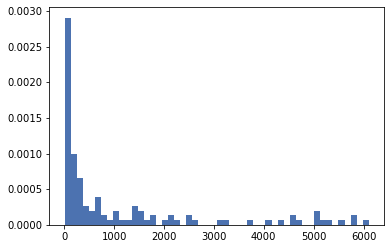

In [254]:
plt.hist(cohort_1_details['age (days)'], bins=50, density=True)

In [255]:
cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_details['extubation_deid_date'], cohort_2_details['birth_deid_date'])]
# cohort_1_details['extubation_duration'] = pd.to_timedelta64[m](cohort_1_details['extubation_duration'], format='%d/%m/%Y %H:%M')
cohort_2_details

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_14764/225197822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["age (days)"] = [((x - y).total_seconds())/86400 for x, y in zip(cohort_2_details['extubation_deid_date'], cohort_2_details['birth_deid_date'])]


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days)
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000


In [256]:
print((cohort_2_details['extubation_deid_date'][1]-cohort_2_details['birth_deid_date'][1]).total_seconds()/86400)

6057.708333333333


In [258]:
cohort_1_age = pd.DataFrame(cohort_1_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_2_age = pd.DataFrame(cohort_2_details['age (days)'].quantile(q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
cohort_1_age


,age (days)
0.0,4.291667
0.1,14.639583
0.2,35.016667
0.3,95.054167
0.4,186.633333
0.5,276.937500
0.6,579.840000
0.7,1067.208403
0.8,1766.358333
0.9,4242.979167


In [259]:
pd.DataFrame(cohort_2_age)

,age (days)
0.0,0.750000
0.1,14.470833
0.2,54.541667
0.3,108.535417
0.4,185.783333
0.5,306.500000
0.6,570.226389
0.7,1227.833333
0.8,2360.787500
0.9,4386.358333


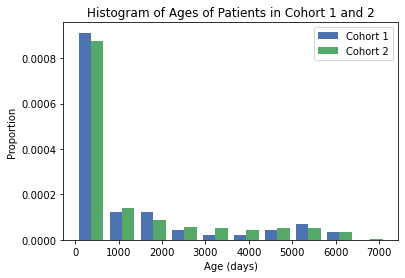

In [328]:
plt.style.use('seaborn-deep')

x = cohort_1_details['age (days)']
y = cohort_2_details['age (days)']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("Age (days)")
plt.ylabel("Proportion")
plt.title("Histogram of Ages of Patients in Cohort 1 and 2")
plt.show()

In [329]:
cohort_1_sex = pd.DataFrame(cohort_1_details['sex'].value_counts())
cohort_1_sex

,sex
Male,68
Female,56


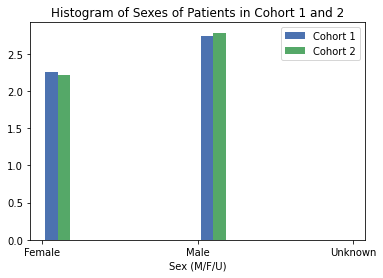

In [331]:
plt.style.use('seaborn-deep')

x = cohort_1_details['sex']
y = cohort_2_details['sex']

# plt.figure(figsize=(1,7))
plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("Sex (M/F/U)")
# plt.ylabel("Proportion")
plt.title("Histogram of Sexes of Patients in Cohort 1 and 2")
plt.show()

In [332]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [333]:
cohort_2_monitor = pd.DataFrame(cohort_2_details['icu_ward'].value_counts())
cohort_2_monitor

,icu_ward
FLAMI,1688
PICU,1175
NICU,381


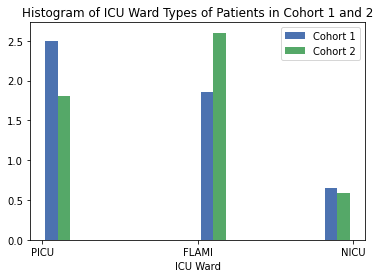

In [334]:
plt.style.use('seaborn-deep')

x = cohort_1_details['icu_ward']
y = cohort_2_details['icu_ward']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("ICU Ward")
# plt.ylabel("Proportion")
plt.title("Histogram of ICU Ward Types of Patients in Cohort 1 and 2")
plt.show()

In [337]:
cohort_2_details


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,1035.0,10
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,1345.0,10
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,2782.0,10
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,922.0,10
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,2826.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,1635.0,3
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,774.0,6
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,5475.0,1
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,7251.0,7


In [335]:
pd.cut(cohort_2_details['age (days)'],[0, 14.6, 35.0, 95.1, 186.6, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 7164]).value_counts()


(1766.4, 4243.0]    432
(95.1, 186.6]       407
(276.9, 579.8]      387
(35.0, 95.1]        363
(4243.0, 7164.0]    347
(0.0, 14.6]         331
(1067.2, 1766.4]    267
(186.6, 276.9]      263
(579.8, 1067.2]     246
(14.6, 35.0]        201
Name: age (days), dtype: int64

In [285]:
for age in cohort_2_details['age (days)']:
    if not age:
        print(age)

This explanation is based on old data....
- Minimum is 190 so we take a sample of 190 from each of these strata 
- 1900 patients remaining from 4852
- Will have 39.159% of data remaining after stratifying age
- Then stratifying depending on icu_minotor looses 29.3%
- Left with 27.7% of cohort 2

In [275]:
pd.cut(cohort_1_details['age (days)'],[0, 14.6, 35.0, 95.1, 186.1, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 6107.8]).value_counts()

(0.0, 14.6]         13
(95.1, 186.1]       13
(579.8, 1067.2]     13
(4243.0, 6107.8]    13
(14.6, 35.0]        12
(35.0, 95.1]        12
(186.1, 276.9]      12
(276.9, 579.8]      12
(1067.2, 1766.4]    12
(1766.4, 4243.0]    12
Name: age (days), dtype: int64

In [276]:
#old cut
pd.cut(cohort_2_details['age (days)'],[0, 14.3, 32.8, 90.2, 185.6, 269.4, 599.5, 1112.7, 1802.0, 4150.1, 6107.8]).value_counts()

(90.2, 185.6]       425
(269.4, 599.5]      415
(1802.0, 4150.1]    404
(32.8, 90.2]        351
(4150.1, 6107.8]    323
(0.0, 14.3]         322
(599.5, 1112.7]     256
(1112.7, 1802.0]    256
(185.6, 269.4]      254
(14.3, 32.8]        198
Name: age (days), dtype: int64

/var/folders/rg/6x4tlzs16c76vmthv_nxc63r0000gn/T/ipykernel_14764/1675098103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort_2_details["amount of data (days)"] = [((x - y).total_seconds())/60 for x, y in zip(cohort_2_details['icu_end_deid_dttm'], cohort_2_details['extubation_deid_date'])]


(array([3.041e+03, 1.220e+02, 3.900e+01, 1.500e+01, 6.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([3.0000000e+01, 1.4456240e+04, 2.8882480e+04, 4.3308720e+04,
        5.7734960e+04, 7.2161200e+04, 8.6587440e+04, 1.0101368e+05,
        1.1543992e+05, 1.2986616e+05, 1.4429240e+05, 1.5871864e+05,
        1.7314488e+05, 1.8757112e+05, 2.0199736e+05, 2.1642360e+05,
        2.3084984e+05, 2.4527608e+05, 2.5970232e+05, 2.7412856e+05,
        2.8855480e+05, 3.0298104e+05

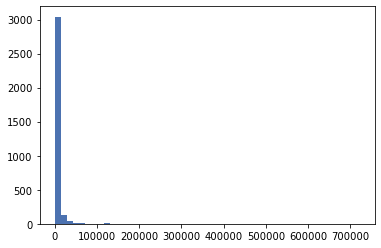

In [277]:
#checking how much data we have after extubation point for cohort 2

cohort_2_details["amount of data (days)"] = [((x - y).total_seconds())/60 for x, y in zip(cohort_2_details['icu_end_deid_dttm'], cohort_2_details['extubation_deid_date'])]
plt.hist(cohort_2_details["amount of data (days)"], bins=50)


In [342]:
cohort_2_details["amount of data (days)"]

0       1035.0
1       1345.0
2       2782.0
3        922.0
5       2826.0
         ...  
5651    1635.0
5652     774.0
5653    5475.0
5654    7251.0
5656    4897.0
Name: amount of data (days), Length: 3244, dtype: float64

(array([33., 22., 16.,  6.,  7.,  9.,  4.,  7.,  9., 11.]),
 array([ 123. ,  253.7,  384.4,  515.1,  645.8,  776.5,  907.2, 1037.9,
        1168.6, 1299.3, 1430. ]),
 <BarContainer object of 10 artists>)

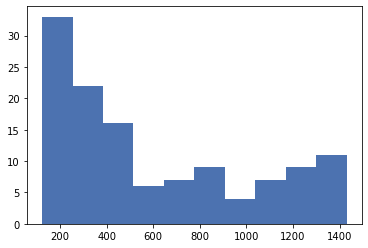

In [278]:
plt.hist(cohort_1_details["extubation_duration"])



In [281]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days)
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,1035.0
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,1345.0
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,2782.0
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,922.0
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,2826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,1635.0
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,774.0
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,5475.0
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,7251.0


## CHECKING WHICH ORDER OF STRATIFICATION LOOSES LESS DATA

In [283]:
# cohort_2_details["age_category"] = [0 if cohort_2_age["age (days)"]]
cohort_2_age

,age (days)
0.0,0.750000
0.1,14.470833
0.2,54.541667
0.3,108.535417
0.4,185.783333
0.5,306.500000
0.6,570.226389
0.7,1227.833333
0.8,2360.787500
0.9,4386.358333


In [288]:
for i, a in zip(cohort_2_details.index, cohort_2_details["age (days)"]):
    if a < 14.6:
        cohort_2_details["age_category"].loc[i] = 1
    if 14.6 <= a < 35:
        cohort_2_details["age_category"].loc[i] = 2
    if 35 <= a < 95.1:
        cohort_2_details["age_category"].loc[i] = 3
    if 95.1 <= a < 186.1:
        cohort_2_details["age_category"].loc[i] = 4
    if 186.1 <= a < 276.9:
        cohort_2_details["age_category"].loc[i] = 5
    if 276.9 <= a < 579.8:
        cohort_2_details["age_category"].loc[i] = 6
    if 579.8 <= a < 1067.2:
        cohort_2_details["age_category"].loc[i] = 7
    if 1067.2 <= a < 1766.4:
        cohort_2_details["age_category"].loc[i] = 8
    if 1766.4 <= a < 4243:
        cohort_2_details["age_category"].loc[i] = 9
    if 4243 <= a < 7164:
        cohort_2_details["age_category"].loc[i] = 10


/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [294]:
cohort_2_stratified_age = cohort_2_details.groupby('age_category', group_keys=False).apply(lambda x: x.sample(201))
cohort_2_stratified_age


,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
5275,LH3789,2018-07-28,NaT,Male,1,2018-07-30 21:40:00,2018-08-04 17:08:00,NaN,NaT,1,1.0,2018-08-01 22:00:00,5.0,NaT,FLAMI,4.916667,4028.0,1
1896,TV1414,2016-03-11,NaT,Female,1,2016-03-14 16:30:00,2016-03-23 15:30:00,NaN,NaT,1,1.0,2016-03-17 16:00:00,5.0,NaT,NICU,6.666667,8610.0,1
5154,EA3695,2018-06-08,NaT,Male,1,2018-06-18 11:40:00,2018-06-22 17:30:00,NaN,NaT,1,1.0,2018-06-21 18:00:00,5.0,NaT,NICU,13.750000,1410.0,1
3117,MX2222,2016-12-27,NaT,Male,1,2017-01-02 18:00:00,2017-01-12 11:10:00,NaN,NaT,1,1.0,2017-01-09 16:00:00,5.0,NaT,NICU,13.666667,4030.0,1
2521,AW1821,2016-08-05,NaT,Female,1,2016-08-07 20:45:00,2016-08-12 18:30:00,NaN,NaT,1,1.0,2016-08-10 00:00:00,5.0,NaT,NICU,5.000000,3990.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,ME3123,2005-04-08,NaT,Male,1,2017-11-17 02:43:00,2017-11-19 11:00:00,NaN,NaT,1,1.0,2017-11-17 19:00:00,5.0,NaT,PICU,4606.791667,2400.0,10
1606,VZ1199,2001-05-28,NaT,Male,1,2016-01-27 14:00:00,2016-01-29 20:15:00,NaN,NaT,1,1.0,2016-01-29 08:00:00,5.0,NaT,FLAMI,5359.333333,735.0,10
380,PR0307,2005-08-10,NaT,Female,1,2018-11-08 18:31:00,2018-11-11 16:00:00,NaN,NaT,1,1.0,2018-11-09 11:00:00,5.0,NaT,PICU,4839.458333,3180.0,10
2264,ZD1638,2003-02-17,NaT,Female,1,2016-06-09 17:06:00,2016-06-17 18:15:00,NaN,NaT,1,1.0,2016-06-13 13:00:00,5.0,NaT,FLAMI,4865.541667,6075.0,10


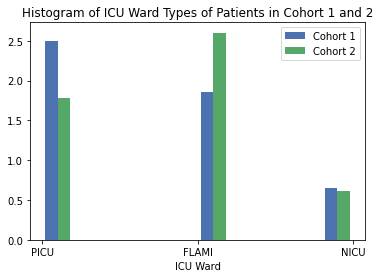

In [298]:
plt.style.use('seaborn-deep')

x = cohort_1_details['icu_ward']
y = cohort_2_stratified_age['icu_ward']

plt.hist([x, y], label=['Cohort 1', 'Cohort 2'], density=True)
plt.legend(loc='upper right')
plt.xlabel("ICU Ward")
# plt.ylabel("Proportion")
plt.title("Histogram of ICU Ward Types of Patients in Cohort 1 and 2")
plt.show()

In [299]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [300]:
cohort_2_monitor = pd.DataFrame(cohort_2_stratified_age['icu_ward'].value_counts())
cohort_2_monitor

,icu_ward
FLAMI,1046
PICU,716
NICU,248


50% PICU, 37.1% FLAMI, 12.9% NICU

In [312]:
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='PICU'].sample(n=716)
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age_icu_temp.append(cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='FLAMI'].sample(n=531))
cohort_2_stratified_age_icu_temp = cohort_2_stratified_age_icu_temp.append(cohort_2_stratified_age[cohort_2_stratified_age['icu_ward']=='NICU'].sample(n=185))

In [313]:
cohort_2_stratified_age_icu = cohort_2_stratified_age_icu_temp
cohort_2_stratified_age_icu

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
5253,YR3770,2018-03-07,NaT,Male,1,2018-07-29 16:51:00,2018-08-13 13:03:00,NaN,NaT,1,1.0,2018-08-07 12:00:00,5.0,NaT,PICU,153.500000,8703.0,4
1717,VG1278,2014-01-20,NaT,Male,1,2016-02-12 00:30:00,2016-02-16 17:30:00,NaN,NaT,1,1.0,2016-02-15 15:00:00,5.0,NaT,PICU,756.625000,1590.0,7
4623,CT3306,2018-01-10,NaT,Male,1,2018-01-12 16:20:00,2018-01-14 13:23:00,NaN,NaT,1,1.0,2018-01-13 18:00:00,5.0,NaT,PICU,3.750000,1163.0,1
1699,BO1268,2007-02-10,NaT,Male,1,2016-01-30 04:00:00,2016-01-31 18:30:00,NaN,NaT,1,1.0,2016-01-30 11:00:00,5.0,NaT,PICU,3276.458333,1890.0,9
3356,QX2405,2002-03-31,NaT,Female,1,2017-03-03 04:00:00,2017-03-27 11:25:00,NaN,NaT,1,1.0,2017-03-15 08:00:00,5.0,NaT,PICU,5463.333333,17485.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,KQ1501,2016-03-17,NaT,Male,6,2016-09-24 22:30:00,2016-10-08 13:00:00,NaN,NaT,1,1.0,2016-09-25 06:00:00,3.0,NaT,NICU,192.250000,19140.0,5
5400,UY3894,2018-09-08,NaT,Male,1,2018-09-15 12:41:00,2018-09-26 12:53:00,NaN,NaT,1,1.0,2018-09-19 13:00:00,5.0,NaT,NICU,11.541667,10073.0,1
3136,MB2234,2016-09-06,NaT,Female,2,2017-01-10 15:00:00,2017-01-13 17:30:00,NaN,NaT,1,1.0,2017-01-12 11:00:00,5.0,NaT,NICU,128.458333,1830.0,4
5340,KU3843,2018-06-30,NaT,Female,1,2018-08-15 23:00:00,2018-08-29 15:35:00,NaN,NaT,1,1.0,2018-08-25 15:00:00,5.0,NaT,NICU,56.625000,5795.0,3


### NOW TRY ICU WARD THEN AGE

In [314]:
cohort_1_monitor = pd.DataFrame(cohort_1_details['icu_ward'].value_counts())
cohort_1_monitor

,icu_ward
PICU,62
FLAMI,46
NICU,16


In [317]:
cohort_2_monitor = pd.DataFrame(cohort_2_details['icu_ward'].value_counts())
cohort_2_monitor


,icu_ward
FLAMI,1688
PICU,1175
NICU,381


In [318]:
cohort_2_stratified_icu_temp = cohort_2_details[cohort_2_details['icu_ward']=='PICU'].sample(n=1175)
cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='FLAMI'].sample(n=872))
cohort_2_stratified_icu_temp = cohort_2_stratified_icu_temp.append(cohort_2_details[cohort_2_details['icu_ward']=='NICU'].sample(n=303))

In [340]:
cohort_2_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
0,ZI0001,1999-10-07,NaT,Male,1,2016-04-28 11:15:00,2016-04-29 12:15:00,NaN,NaT,1,1.0,2016-04-28 19:00:00,5.0,NaT,PICU,6048.791667,1035.0,10
1,ZI0001,1999-10-07,NaT,Male,2,2016-05-07 13:43:00,2016-05-08 15:25:00,NaN,NaT,1,1.0,2016-05-07 17:00:00,3.0,NaT,PICU,6057.708333,1345.0,10
2,XY0002,1998-06-09,NaT,Male,1,2016-01-07 16:20:00,2016-01-09 16:22:00,NaN,NaT,1,1.0,2016-01-07 18:00:00,5.0,NaT,PICU,6421.750000,2782.0,10
3,DX0003,1998-11-04,NaT,Female,1,2016-06-24 18:05:00,2016-06-25 16:22:00,NaN,NaT,1,1.0,2016-06-25 01:00:00,5.0,NaT,FLAMI,6443.041667,922.0,10
5,ZY0005,1999-03-10,NaT,Male,1,2016-04-29 17:15:00,2016-05-02 18:11:00,NaN,NaT,1,1.0,2016-04-30 19:05:00,5.0,NaT,FLAMI,6261.795139,2826.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,JQ4115,2018-11-09,NaT,Male,1,2018-12-29 20:04:00,2018-12-31 17:15:00,NaN,NaT,1,1.0,2018-12-30 14:00:00,5.0,NaT,PICU,51.583333,1635.0,3
5652,SR4116,2018-01-11,NaT,Male,1,2018-12-29 21:35:00,2018-12-31 12:54:00,NaN,NaT,1,1.0,2018-12-31 00:00:00,5.0,NaT,PICU,354.000000,774.0,6
5653,HK4117,2018-12-28,NaT,Male,1,2018-12-28 08:20:00,2019-01-01 13:15:00,NaN,NaT,1,1.0,2018-12-28 18:00:00,5.0,NaT,NICU,0.750000,5475.0,1
5654,TI4118,2016-09-11,NaT,Male,1,2018-12-26 21:20:00,2019-01-08 12:51:00,NaN,NaT,1,1.0,2019-01-03 12:00:00,5.0,NaT,PICU,844.500000,7251.0,7


In [320]:
cohort_2_stratified_icu = cohort_2_stratified_icu_temp
cohort_2_stratified_icu

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
1458,TR1110,2015-06-14,NaT,Female,3,2017-12-17 19:15:00,2017-12-29 14:30:00,NaN,NaT,1,1.0,2017-12-26 21:00:00,5.0,NaT,PICU,926.875000,3930.0,7
1029,QW0820,2014-11-05,NaT,Male,1,2017-03-04 19:50:00,2017-03-11 18:40:00,NaN,NaT,1,1.0,2017-03-10 12:15:00,5.0,NaT,PICU,856.510417,1825.0,7
5613,JR4079,2018-09-16,NaT,Male,1,2018-12-10 20:30:00,2018-12-16 14:20:00,NaN,NaT,1,1.0,2018-12-15 11:00:00,5.0,NaT,PICU,90.458333,1640.0,3
2205,ZZ1600,2014-08-20,NaT,Female,1,2016-05-19 08:00:00,2016-05-22 10:15:00,NaN,NaT,1,1.0,2016-05-19 15:00:00,5.0,NaT,PICU,638.625000,4035.0,7
1617,QQ1206,2015-09-11,NaT,Male,1,2016-03-17 16:35:00,2016-03-20 15:20:00,NaN,NaT,1,1.0,2016-03-19 12:00:00,5.0,NaT,PICU,190.500000,1640.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,LB2274,2017-01-06,NaT,Male,2,2017-04-04 11:10:00,2017-04-06 17:00:00,NaN,NaT,0,1.0,2017-04-04 12:00:00,5.0,NaT,NICU,88.500000,3180.0,3
2535,AN1830,2016-07-11,NaT,Male,1,2016-08-10 07:15:00,2016-08-15 12:42:00,NaN,NaT,1,1.0,2016-08-13 16:40:00,5.0,NaT,NICU,33.694444,2642.0,2
4205,TZ3016,2017-09-17,NaT,Female,1,2017-10-01 00:40:00,2017-10-25 12:45:00,NaN,NaT,1,1.0,2017-10-21 11:00:00,5.0,NaT,NICU,34.458333,5865.0,2
1366,FB1042,2015-10-23,NaT,Male,1,2016-01-30 12:35:00,2016-02-09 18:30:00,NaN,NaT,1,1.0,2016-02-07 17:00:00,5.0,NaT,NICU,107.708333,2970.0,4


In [339]:
pd.cut(cohort_2_stratified_icu['age (days)'],[0, 14.6, 35.0, 95.1, 186.6, 276.9, 579.8, 1067.2, 1766.4, 4243.0, 7164]).value_counts()



(1766.4, 4243.0]    338
(276.9, 579.8]      287
(95.1, 186.6]       285
(35.0, 95.1]        260
(4243.0, 7164.0]    258
(0.0, 14.6]         237
(1067.2, 1766.4]    189
(579.8, 1067.2]     177
(186.6, 276.9]      175
(14.6, 35.0]        144
Name: age (days), dtype: int64

In [323]:
cohort_2_stratified_icu_age = cohort_2_stratified_icu.groupby('age_category', group_keys=False).apply(lambda x: x.sample(144))
cohort_2_stratified_icu_age

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward,age (days),amount of data (days),age_category
2641,MC1902,2016-09-04,NaT,Male,3,2016-09-07 12:45:00,2016-09-09 20:00:00,NaN,NaT,1,1.0,2016-09-09 18:45:00,5.0,NaT,PICU,5.781250,75.0,1
1772,FY1319,2016-02-23,NaT,Female,1,2016-02-25 02:00:00,2016-02-29 18:00:00,NaN,NaT,1,1.0,2016-02-28 15:00:00,5.0,NaT,NICU,5.625000,1620.0,1
4869,UQ3488,2018-03-17,NaT,Male,1,2018-03-24 20:15:00,2018-04-03 11:51:00,NaN,NaT,1,1.0,2018-03-28 07:00:00,5.0,NaT,NICU,11.291667,8931.0,1
5288,CE3799,2018-07-31,NaT,Male,1,2018-08-01 17:30:00,2018-08-09 18:28:00,NaN,NaT,1,1.0,2018-08-06 17:30:00,5.0,NaT,FLAMI,6.729167,4378.0,1
5155,EP3696,2018-06-16,NaT,Male,1,2018-06-17 16:35:00,2018-06-28 12:15:00,NaN,NaT,1,1.0,2018-06-24 13:00:00,5.0,NaT,NICU,8.541667,5715.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,ZA0072,2001-05-31,NaT,Female,1,2016-09-25 15:53:00,2016-09-26 12:00:00,NaN,NaT,1,1.0,2016-09-25 23:00:00,5.0,NaT,PICU,5596.958333,780.0,10
1351,HC1030,2004-07-24,NaT,Female,1,2017-03-10 16:16:00,2017-03-11 12:40:00,NaN,NaT,1,1.0,2017-03-10 23:00:00,5.0,NaT,PICU,4612.958333,820.0,10
142,UE0118,2002-03-20,NaT,Male,1,2018-04-14 17:15:00,2018-04-18 17:00:00,NaN,NaT,1,1.0,2018-04-15 14:00:00,5.0,NaT,PICU,5870.583333,4500.0,10
4777,HT3415,2003-10-19,NaT,Male,1,2018-02-22 16:40:00,2018-02-26 10:52:00,NaN,NaT,1,1.0,2018-02-23 09:00:00,5.0,NaT,PICU,5241.375000,4432.0,10


## AGE THEN ICU LEAVES 1432 PATIENTS
## ICU THEN AGE LEAVES 1440 PATIENTS

In [341]:
cohort_3_details

,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,intubation_flag,extubation_flag,extubation_deid_date,extubation_score,re_intubation_deid_date,icu_ward
49,OL0043,2000-07-12,2018-04-25,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaT,1,1.0,2016-06-09 02:00:00,5.0,NaT,PICU
91,JT0073,2003-04-26,2018-08-18,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaT,1,1.0,2018-07-29 15:15:00,5.0,NaT,FLAMI
124,CD0102,2003-02-18,2018-09-17,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaT,1,1.0,2017-08-09 19:00:00,5.0,NaT,PICU
160,XX0133,2002-01-25,2018-01-24,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaT,1,1.0,2016-02-21 11:00:00,5.0,NaT,PICU
181,DN0147,2000-08-11,2017-08-19,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaT,1,1.0,2016-10-14 14:00:00,5.0,NaT,PICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,IE3963,2013-04-09,2018-11-20,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaT,1,1.0,2018-10-31 13:00:00,5.0,NaT,FLAMI
5517,JV3994,2018-10-16,2018-10-30,Female,1,2018-10-23 02:00:00,2018-10-30 13:45:00,1.0,2018-10-28 10:00:00,1,1.0,2018-10-28 10:00:00,5.0,2018-10-29 20:00:00,NICU
5535,BB4010,2003-09-15,2018-11-20,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaT,1,1.0,2018-11-20 23:00:00,5.0,NaT,FLAMI
5551,WE4023,2018-11-10,2019-01-03,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaT,1,1.0,2019-01-03 09:30:00,5.0,NaT,NICU
